In [1]:
import pandas as pd
import seaborn as sns
print(sns.__version__)


0.9.0


## Usamos pd.read_csv('tabela') para ler a tabela que queremos trabalhar

In [2]:
notas = pd.read_csv('ratings.csv')

In [3]:
notas.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Função shape para vermos quantas linhas temos na tabela.

In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ['usuarioID',  'filmeID', 'nota', 'momento']
notas.head(5)

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## O unique é o distinct do SQL. Bastante usado quando temos inumeros valores iguais

In [6]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

## Contando os valores da coluna nota usando value_counts(). Se perceber vemos que a nota 4.0 foi dada 26818 e assim em diante com outras notas

In [7]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

## Mean é media em inglês. Com isso vemos que a média da nota foi 3.50

In [8]:
print("Media",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


In [9]:
notas.nota.head(10)

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
5    3.0
6    5.0
7    4.0
8    5.0
9    5.0
Name: nota, dtype: float64

## Para criar os gráficos precisamos apenas chamar a função plot() , por padrão o Pandas irá exibir os dados como um gráfico de linha. Dentro do plot coloquei kind (tipo) = 'hist'(histograma) para conseguir entender as linhas

<AxesSubplot:ylabel='Frequency'>

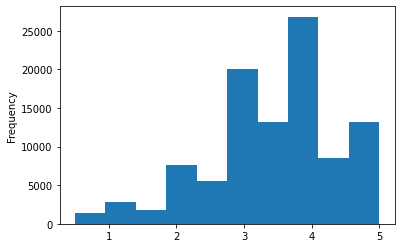

In [10]:
notas.nota.plot(kind='hist')

## Tirando todas as medidas de uam vez só usando describe 

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

## Eu tive que instalar essa biblioteca antes de tentar executar por causa que não tinha instalado ainda, se você tentar aplicar o seaborn irá dar erro.

In [12]:
!pip install seaborn


## Importando uma nova biblioteca (seaborn) para montar novas visualizações

<AxesSubplot:xlabel='nota'>

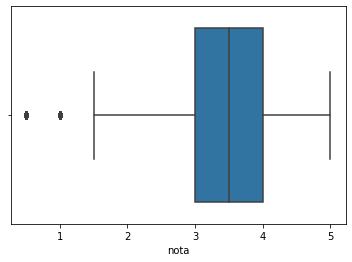

In [13]:
import seaborn as sns
sns.boxplot(notas.nota)

In [14]:
import pandas as pd
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', 'titulo', 'generos']
filmes.head(5)

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando algumas notas especificas por filme

In [16]:
notas.query('filmeID == 1').nota.mean()

3.9209302325581397

In [17]:
notas.query('filmeID == 2').nota.mean()

3.4318181818181817

In [18]:
medias_por_filme = notas.groupby('filmeID').mean()['nota']
medias_por_filme.head(10)

filmeID
1     3.920930
2     3.431818
3     3.259615
4     2.357143
5     3.071429
6     3.946078
7     3.185185
8     2.875000
9     3.125000
10    3.496212
Name: nota, dtype: float64

<AxesSubplot:ylabel='Frequency'>

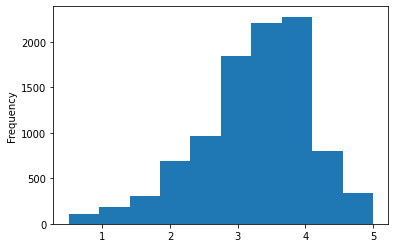

In [19]:
medias_por_filme.plot(kind='hist')

<AxesSubplot:xlabel='nota'>

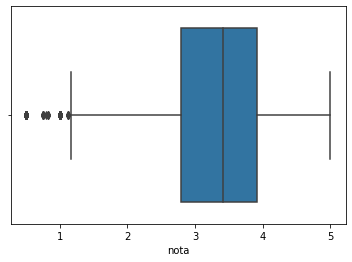

In [20]:
sns. boxplot(medias_por_filme)

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

## Mostrando o grafico pela biblioteca seaborn usando sns. coloquei o bins para ficar o grafico com o mesmo numeros de blocos na função boxplot

<AxesSubplot:xlabel='nota'>

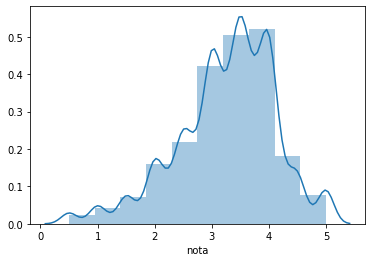

In [22]:
sns.distplot(medias_por_filme, bins = 10)

In [23]:
!pip install matplotlib

In [24]:
import matplotlib.pyplot as plt

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

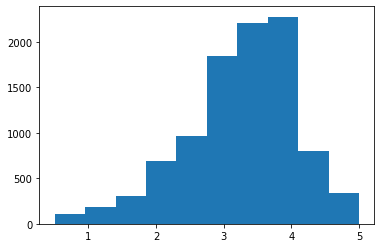

In [25]:
plt.hist(medias_por_filme)

## Extraindo dados do Kaggle onde pegamos informações de 5k filmes 

In [26]:
tmdb = pd.read_csv("tmdb_movies.csv")
tmdb.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


## Olhando quais são as linguas de cada filmes usando o unique 

In [27]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

## Fazendo a contagem de qunatas vezes aparece a lingua original.
to_frame para parecer uma tabela e reset_index para resetar o index

In [28]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language","total" ]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


## fazendo um grafico de barra com barplot.. No x eu pego o original language e no y o total

<AxesSubplot:xlabel='original_language', ylabel='total'>

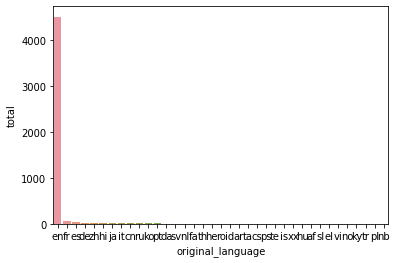

In [29]:
sns.barplot(x = "original_language", y = "total", data = contagem_de_lingua)

## usando catplot para fazer uma consulta mais rapida

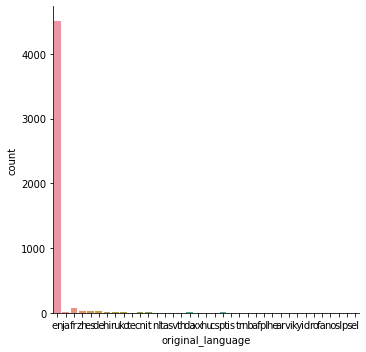

In [30]:
sns.catplot(x="original_language", kind="count", data=tmdb)

## Explorando os dados com visualização pizza, ele não é recomendado por conta que tem muitas informações

([<matplotlib.patches.Wedge at 0x253478335f8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

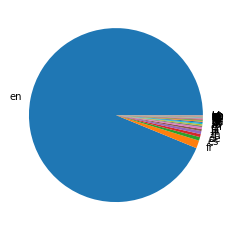

In [33]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["original_language"]) 

## pegando o total de filmes em inglês e outros 

In [42]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [43]:
dados = {
        'lingua' : ['inglês','outros'],
        'total': [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['inglês', 'outros'], 'total': [4505, 298]}

In [49]:
dados =pd.DataFrame(dados)
dados


,lingua,total
0,inglês,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

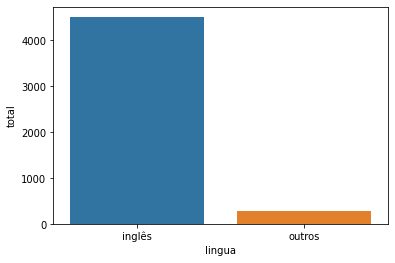

In [47]:
sns.barplot(x = "lingua", y = "total", data = dados)

([<matplotlib.patches.Wedge at 0x25347bfaeb8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'inglês'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

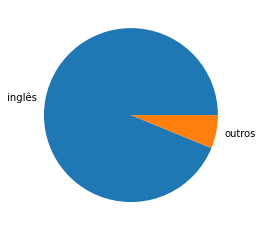

In [51]:
plt.pie(dados["total"], labels = dados["lingua"])

## Agora vamso explorar as linguas que não seja ingês 

In [59]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ro     2
cs     2
id     2
ta     2
ar     2
sl     1
no     1
is     1
af     1
xx     1
pl     1
ky     1
nb     1
vi     1
te     1
tr     1
ps     1
el     1
hu     1
Name: original_language, dtype: int64

## Vamos usar o catplot para fazer uma visualizaçõa de barras. Função aspect para colocar o grafico mais aberto, palette = "GnBu_d" para colocar cor escura e depois diminuindo o tom e por final usar o order para ordenar do maior para o menor 

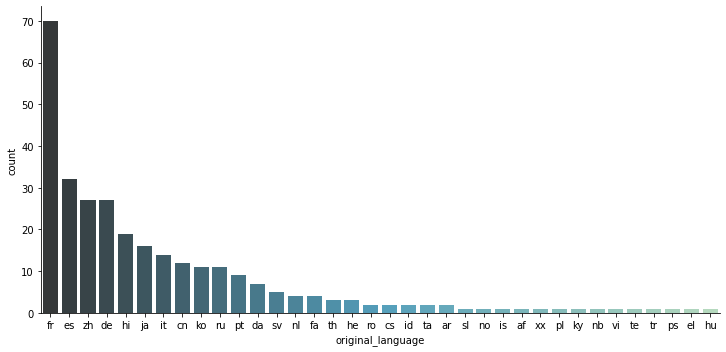

In [72]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles,
          aspect = 2,
            palette = "GnBu_d", 
           order = total_por_lingua_de_outros_filmes.index)
    